In [1]:
import pandas as pd
import plotly.express as px
import os
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter
# from wordcloud import WordCloud
# from deep_translator import GoogleTranslator

import pandas as pd
import plotly.express as px
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

date_cols = {
    'olist_orders_dataset.csv': [
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date',
    ],
    'olist_order_items_dataset.csv': [
        'shipping_limit_date',
    ],
    'olist_order_reviews_dataset.csv': [
        'review_creation_date',
        'review_answer_timestamp',
    ],
    # The following datasets have NO date columns:
    # 'olist_customers_dataset.csv'
    # 'olist_geolocation_dataset.csv'
    # 'olist_order_payments_dataset.csv'
    # 'olist_products_dataset.csv'
    # 'olist_sellers_dataset.csv'
    # 'product_category_name_translation.csv'
    'olist_orders_delivered_clean.csv': [
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date',
    ],
    'olist_order_items_delivered_cleaned.csv': [
        'shipping_limit_date',
    ],
}

def read_olist_csv(path):
    """
    Reads an Olist CSV and parses dates for the correct columns.
    Args:
        path (str): Path to the CSV file.
    Returns:
        pd.DataFrame: Loaded dataframe with date columns parsed as datetime.
    """
    # Extract just the filename, e.g., 'olist_orders_dataset.csv'
    filename = os.path.basename(path)
    # Get the correct date columns for this file, or an empty list
    parse_dates = date_cols.get(filename, [])
    # Read the CSV, parsing the specified date columns (if any)
    return pd.read_csv(path, parse_dates=parse_dates)

df_orders      = read_olist_csv('../data/olist_orders_dataset.csv')
df_customers   = read_olist_csv('../data/olist_customers_dataset.csv')
df_order_items = read_olist_csv('../data/olist_order_items_dataset.csv')
df_order_payments = read_olist_csv('../data/olist_order_payments_dataset.csv')
df_reviews     = read_olist_csv('../data/olist_order_reviews_dataset.csv')
df_products    = read_olist_csv('../data/olist_products_dataset.csv')
df_prod_cat_tr = read_olist_csv('../data/product_category_name_translation.csv')
df_sellers     = read_olist_csv('../data/olist_sellers_dataset.csv')
df_geolocation = read_olist_csv('../data/olist_geolocation_dataset.csv')

# Cleaned dataset
df_orders_delivered_clean       = read_olist_csv('../data/cleaned_data/olist_orders_delivered_clean.csv')
df_geolocation_clean            = read_olist_csv('../data/cleaned_data/olist_geolocation_dataset_city_cleaned_final_Jo.csv')
df_sellers_cleaned              = read_olist_csv('../data/cleaned_data/olist_sellers_dataset_cleaned.csv')
df_products_cleaned             = read_olist_csv('../data/cleaned_data/olist_products_dataset_cleaned.csv')
df_order_items_delivered_clean  = read_olist_csv('../data/cleaned_data/olist_order_items_delivered_cleaned.csv')
df_order_payments_delivered_clean = read_olist_csv('../data/cleaned_data/olist_order_payments_delivered_cleaned.csv')

In [2]:
# Load the reviews dataset:
df_reviews.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47


| Column Name               | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| `review_id`              | Unique identifier for each review.                                          |
| `order_id`               | Identifier linking the review to a specific order.                          |
| `review_score`           | Numerical score given by the customer (1 to 5, where 1 = worst, 5 = best).  |
| `review_comment_title`   | Optional short title provided by the customer in their review.              |
| `review_comment_message` | Optional detailed review message written by the customer.                   |
| `review_creation_date`   | Date when the customer submitted the review.                                |
| `review_answer_timestamp`| Date and time when the seller or platform responded to the review.          |

In [3]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [4]:
df_reviews.describe()

,review_score,review_creation_date,review_answer_timestamp
count,99224.000000,99224,99224
mean,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,1.347579,NaN,NaN


In [5]:
summary = []

for col in df_reviews.columns:
    unique_vals = df_reviews[col].dropna().unique()
    summary.append({
        'Column': col,
        'Unique Count': len(unique_vals),
        'Unique Values': unique_vals
    })

df_summary = pd.DataFrame(summary)
df_summary

,Column,Unique Count,Unique Values
0,review_id,98410,"[7bc2406110b926393aa56f80a40eba40, 80e641a11e5..."
1,order_id,98673,"[73fc7af87114b39712e6da79b0a377eb, a548910a1c6..."
2,review_score,5,"[4, 5, 1, 3, 2]"
3,review_comment_title,4527,"[recomendo, Super recomendo, Não chegou meu pr..."
4,review_comment_message,36159,"[Recebi bem antes do prazo estipulado., Parabé..."
5,review_creation_date,636,"[2018-01-18 00:00:00, 2018-03-10 00:00:00, 201..."
6,review_answer_timestamp,98248,"[2018-01-18 21:46:59, 2018-03-11 03:05:13, 201..."


In [6]:
# Filter reviews to include only those from delivered orders
delivered_order_ids = df_orders_delivered_clean['order_id'].unique()

# Filter reviews to only include reviews from delivered orders
df_reviews_delivered = df_reviews[df_reviews['order_id'].isin(delivered_order_ids)]

# Display basic info about the filtered dataset
print(f"Total reviews: {len(df_reviews)}")
print(f"Reviews from delivered orders: {len(df_reviews_delivered)}")
print(f"Percentage of reviews from delivered orders: {len(df_reviews_delivered)/len(df_reviews)*100:.2f}%")

# Show the first few rows
df_reviews_delivered.head()

Total reviews: 99224
Reviews from delivered orders: 96166
Percentage of reviews from delivered orders: 96.92%


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [7]:
df_reviews_delivered.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       85018
review_comment_message     57148
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In real-world reviews, it's very common for customers to:

- Write only a message and leave the title blank (most typical)
- Leave just a title (e.g., "Great!" or "Terrible!") without elaborating

But if both review_comment_title and review_comment_message are missing, then there's no actual comment—just a score. These are often not useful for text analysis or NLP.

In [8]:
# Count rows where both title and message are missing:
no_comment_count = df_reviews_delivered[
    df_reviews_delivered['review_comment_title'].isna() &
    df_reviews_delivered['review_comment_message'].isna()
].shape[0]

print(f"Rows with no title and no message: {no_comment_count}")

Rows with no title and no message: 55453


In [9]:
df_reviews_delivered.duplicated().sum()

0

In [10]:
df_reviews_delivered.to_csv('../data/cleaned_data/olist_order_reviews_delivered_cleaned.csv', index=False)

In [ ]:
df_reviews_delivered['review_id'].duplicated().sum()

712

In [22]:
# Identify duplicated review_ids
duplicated_review_ids = df_reviews_delivered[df_reviews_delivered['review_id'].duplicated(keep=False)]

# Sort by review_id to group duplicates together
sorted_duplicates = duplicated_review_ids.sort_values('review_id')

# Add a column to identify if reviews are negative (1-3) or positive (4-5)
sorted_duplicates['review_type'] = sorted_duplicates['review_score'].apply(
    lambda x: 'Negative (1-3)' if x <= 3 else 'Positive (4-5)'
)

# Display the duplicates
print(f"Number of duplicate review_ids: {len(sorted_duplicates)}")
print(f"Number of unique duplicate review_ids: {sorted_duplicates['review_id'].nunique()}")

Number of duplicate review_ids: 1408
Number of unique duplicate review_ids: 696


In [ ]:

# Group analysis of duplicates by review type
review_type_counts = sorted_duplicates.groupby('review_type').size()
print("\nDistribution of duplicate reviews by score type:")
print(review_type_counts)

# Analyze if there's a pattern where first reviews are more negative/positive
# than subsequent ones
duplicates_with_sequence = sorted_duplicates.copy()
duplicates_with_sequence['sequence'] = duplicates_with_sequence.groupby('review_id').cumcount() + 1

# Compare first vs second reviews
first_reviews = duplicates_with_sequence[duplicates_with_sequence['sequence'] == 1]
second_reviews = duplicates_with_sequence[duplicates_with_sequence['sequence'] == 2]

# Calculate average scores for first and subsequent reviews
first_avg_score = first_reviews['review_score'].mean()
second_avg_score = second_reviews['review_score'].mean()

print(f"\nAverage score for first reviews: {first_avg_score:.2f}")
print(f"Average score for second reviews: {second_avg_score:.2f}")

# Check transitions between review types (negative to positive or vice versa)
if len(first_reviews) == len(second_reviews):
    reviews_combined = pd.merge(
        first_reviews[['review_id', 'review_score', 'review_type']], 
        second_reviews[['review_id', 'review_score', 'review_type']], 
        on='review_id', 
        suffixes=('_first', '_second')
    )
    
    transitions = reviews_combined.groupby(['review_type_first', 'review_type_second']).size()
    print("\nTransitions between review types:")
    print(transitions)

-----

In [11]:
df_reviews = df_reviews_delivered.copy()

In [12]:
# Calculate the difference in days between review creation and reply:
df_reviews['timestamp_diff'] = (
    df_reviews['review_answer_timestamp'] - df_reviews['review_creation_date']
).dt.days

# Check how many are negative:
negative_diff = df_reviews[df_reviews['timestamp_diff'] < 0]
print(f"Reviews where reply came before review: {len(negative_diff)}")

Reviews where reply came before review: 0


## Data Analysis

In [13]:
# Calculate time difference in days:
df_reviews['reply_delay_days'] = (
    df_reviews['review_answer_timestamp'] - df_reviews['review_creation_date']
).dt.total_seconds() / 86400

# Calculate average (exclude any negative or missing delays):
avg_reply_delay = df_reviews[df_reviews['reply_delay_days'] >= 0]['reply_delay_days'].mean()

print(f"Average reply time to customer reviews: {avg_reply_delay:.2f} days")

Average reply time to customer reviews: 3.15 days


In [14]:
# Filter reviews with low scores (1 to 3 stars):
low_reviews = df_reviews[df_reviews['review_score'].isin([1, 2, 3])]

### Text Analysis

In [15]:
df_reviews_text_analysis = df_reviews_delivered.copy()

In [16]:
# Remove rows where both comment title and message are NaN:
df_reviews_text_analysis = df_reviews_text_analysis[
    df_reviews_text_analysis['review_comment_title'].notna() |
    df_reviews_text_analysis['review_comment_message'].notna()
]

In [17]:
# Double check:
no_comment_count = df_reviews_text_analysis[
    df_reviews_text_analysis['review_comment_title'].isna() &
    df_reviews_text_analysis['review_comment_message'].isna()
].shape[0]

print(f"Rows with no title and no message: {no_comment_count}")

Rows with no title and no message: 0


In [18]:
# Combine comment title and message into a single column:
low_reviews['full_comment'] = (
    low_reviews['review_comment_title'].fillna('') + ' ' + 
    low_reviews['review_comment_message'].fillna('')
).str.strip()

C:\Users\User\AppData\Local\Temp\ipykernel_25536\4154699799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_reviews['full_comment'] = (


In [30]:
# Prepare and clean text:
all_text = ' '.join(low_reviews['full_comment'].dropna().astype(str).tolist())
words = re.findall(r'\b\w+\b', all_text.lower())

# Load Portuguese and English stopwords:
stopwords_pt = set(stopwords.words('portuguese'))
stopwords_eng = set(stopwords.words('english'))
stop_words = stopwords_pt.union(stopwords_eng)

# Remove stopwords:
filtered_words = [word for word in words if word not in stop_words]

# Get 100 most common words:
common_words = Counter(filtered_words).most_common(100)

# Translate with cache:
translator = GoogleTranslator(source='pt', target='en')
cache = {}
translated_common_words = []

for word, count in common_words:
    try:
        if word not in cache:
            cache[word] = translator.translate(word)
        translated_common_words.append((cache[word], count))
    except Exception as e:
        translated_common_words.append((word, count))

# Create frequency dict for WordCloud:
translated_freq = dict(translated_common_words)

# Generate and display WordCloud:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(translated_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Translated Word Cloud (1-3 Star Reviews)", fontsize=14)
plt.show()

NameError: name 'GoogleTranslator' is not defined

In [31]:
# Word frequency:
for word, count in translated_common_words:
    print(f"{word}: {count}")

NameError: name 'translated_common_words' is not defined

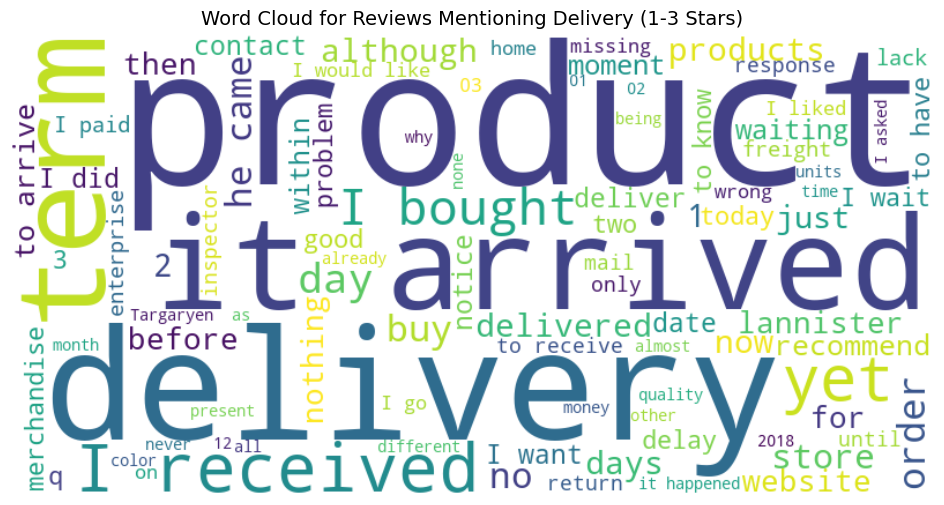

In [ ]:
# Define delivery-related keywords (in both Portuguese and English):
delivery_keywords = ['entregue', 'entrega', 'chegou', 'chegar', 'prazo', 'delivered', 'delivery', 'arrived', 'arrival']

# Step 2: Filter reviews that mention any of those keywords:
def contains_delivery_word(text):
    text = text.lower()
    return any(keyword in text for keyword in delivery_keywords)

delivery_related_reviews = low_reviews[low_reviews['full_comment'].astype(str).apply(contains_delivery_word)]

# Join and clean text:
all_delivery_text = ' '.join(delivery_related_reviews['full_comment'].dropna().astype(str).tolist())
delivery_words = re.findall(r'\b\w+\b', all_delivery_text.lower())

# Load stopwords:
stopwords_pt = set(stopwords.words('portuguese'))
stopwords_eng = set(stopwords.words('english'))
stop_words = stopwords_pt.union(stopwords_eng)

# Remove stopwords:
filtered_delivery_words = [word for word in delivery_words if word not in stop_words]

# Get most common words:
common_delivery_words = Counter(filtered_delivery_words).most_common(100)

# Translate with cache:
translator = GoogleTranslator(source='pt', target='en')
cache = {}
translated_common_delivery_words = []

for word, count in common_delivery_words:
    try:
        if word not in cache:
            cache[word] = translator.translate(word)
        translated_common_delivery_words.append((cache[word], count))
    except Exception:
        translated_common_delivery_words.append((word, count))

# Create word cloud:
translated_delivery_freq = dict(translated_common_delivery_words)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(translated_delivery_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Reviews Mentioning Delivery (1-3 Stars)", fontsize=14)
plt.show()

In [57]:
# Word frequency (translated, delivery-related low reviews):
for word, count in translated_common_delivery_words:
    print(f"{word}: {count}")

product: 3558
delivery: 2092
delivered: 1741
it arrived: 1612
term: 1431
I received: 1076
yet: 919
I bought: 911
day: 614
order: 515
buy: 490
no: 457
he came: 452
store: 429
now: 363
2: 353
days: 344
products: 336
although: 334
1: 333
delivered: 332
just: 320
then: 287
two: 285
for: 281
mail: 279
lannister: 275
before: 274
nothing: 267
website: 265
recommend: 254
to arrive: 250
waiting: 233
moment: 230
delay: 207
contact: 206
I want: 206
deliver: 203
within: 202
date: 199
notice: 197
other: 195
I did: 193
good: 186
delay: 183
delay: 180
to have: 180
good: 179
3: 178
merchandise: 177
I wait: 176
q: 176
today: 175
to know: 175
problem: 172
two: 171
freight: 168
enterprise: 165
lack: 165
I paid: 161
only: 149
response: 146
inspector: 141
until: 140
to receive: 140
return: 138
I would like: 134
mail: 134
I liked: 133
03: 130
missing: 128
on: 128
I go: 125
home: 124
time: 120
wrong: 120
it happened: 119
color: 118
none: 118
other: 117
month: 116
present: 116
quality: 116
being: 114
as: 114


In [58]:
# Total number of 1–3 star reviews:
total_low_reviews = len(low_reviews)

# Number of low reviews that mention delivery-related keywords:
delivery_issue_reviews = len(delivery_related_reviews)

# Percentage of low reviews mentioning delivery issues:
delivery_issue_percentage = (delivery_issue_reviews / total_low_reviews) * 100

print(f"Out of {total_low_reviews} low-rated reviews, {delivery_issue_reviews} mention delivery-related issues.")
print(f"That's approximately {delivery_issue_percentage:.2f}% of all 1-3 star reviews.")

Out of 22754 low-rated reviews, 5619 mention delivery-related issues.
That's approximately 24.69% of all 1-3 star reviews.


## Univariate Analysis

In [ ]:
df_reviews = df_reviews_delivered.copy()

In [46]:
# Review score distribution:
fig = px.histogram(
    df_reviews,
    x='review_score',
    title='Review Score Distribution',
    color='review_score',
    category_orders={'review_score': [1, 2, 3, 4, 5]},
    color_discrete_sequence=px.colors.qualitative.Bold
)
fig.show()

In [47]:
# Comment length:
df_reviews['comment_length'] = df_reviews['review_comment_message'].astype(str).apply(len)

fig = px.histogram(
    df_reviews,
    x='comment_length',
    nbins=50,
    title='Length of Review Comments'
)
fig.show()

## Bivariate Analysis

In [48]:
# Review score vs comment length:
fig = px.box(
    df_reviews,
    x='review_score',
    y='comment_length',
    title='Comment Length by Review Score',
    color='review_score'
)
fig.show()

In [49]:
# Review score over time:
df_reviews['review_creation_date'] = pd.to_datetime(df_reviews['review_creation_date'])

fig = px.box(
    df_reviews,
    x=df_reviews['review_creation_date'].dt.month,
    y='review_score',
    title='Monthly Review Score Distribution',
    labels={'x': 'Month'}
)
fig.show()

In [50]:
# Make sure comment length and month are already computed:
df_reviews['comment_length'] = df_reviews['review_comment_message'].astype(str).apply(len)
df_reviews['month'] = pd.to_datetime(df_reviews['review_creation_date']).dt.to_period("M").astype(str)

# Count reviews per score per month:
low_score_summary = (
    df_reviews[df_reviews['review_score'].isin([1, 2, 3])]
    .groupby(['month', 'review_score'])
    .agg(count=('review_id', 'count'))
    .reset_index()
)

# Pivot to wide format:
highlight_table = low_score_summary.pivot(index='month', columns='review_score', values='count').fillna(0)

# Add a total low score column:
highlight_table['total_low_reviews'] = highlight_table.sum(axis=1)

# Sort by total_low_reviews:
highlight_table = highlight_table.sort_values(by='total_low_reviews', ascending=False)

In [51]:
# Display the top 10 months with the most low score reviews:
top_low_score_months = highlight_table.head(10)
top_low_score_months

review_score,1,2,3,total_low_reviews
month,,,,
2018-03,1139.0,204.0,317.0,1660.0
2017-12,892.0,185.0,280.0,1357.0
2018-04,836.0,182.0,269.0,1287.0
2018-08,675.0,185.0,317.0,1177.0
2018-02,609.0,142.0,263.0,1014.0
2018-05,574.0,147.0,255.0,976.0
2018-01,548.0,145.0,240.0,933.0
2018-06,505.0,151.0,256.0,912.0
2018-07,381.0,96.0,188.0,665.0


In [52]:
# Prepare data for highlighting:
highlight_plot_data = low_score_summary.copy()
highlight_plot_data['review_score'] = highlight_plot_data['review_score'].astype(str)

fig = px.bar(
    highlight_plot_data,
    x='month',
    y='count',
    color='review_score',
    barmode='stack',
    title='Low Review Score Distribution by Month (1-3 Stars)',
    color_discrete_sequence=px.colors.qualitative.Bold
)
fig.update_layout(xaxis_title='Month', yaxis_title='Number of Reviews')
fig.show()

In [53]:
# Prepare data for highlighting all review scores (1 to 5)
all_score_summary = df_reviews.copy()  # Replace with your full review dataset
all_score_summary['review_score'] = all_score_summary['review_score'].astype(str)

# Group by month and review_score
all_score_plot_data = (
    all_score_summary
    .groupby(['month', 'review_score'])
    .size()
    .reset_index(name='count')
)

# Plot
fig = px.bar(
    all_score_plot_data,
    x='month',
    y='count',
    color='review_score',
    barmode='stack',
    title='Review Score Distribution by Month (1–5 Stars)',
    color_discrete_sequence=px.colors.qualitative.Bold
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Number of Reviews'
)

fig.show()